In [1]:
import pandas as pd

In [2]:
weather = pd.read_csv("C:\\Users\\hp\\OneDrive\\Desktop\\Weather Project\\DATA\\weather_cleaned.csv",parse_dates=['Date_Time'])

In [3]:
weather.set_index("Date_Time",inplace = True)

In [4]:
weather

,Location,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh,year,month,day,hour,day_of_week,is_weekend,season
Date_Time,,,,,,,,,,,,
2024-01-14 21:12:46,San Diego,10.683001,41.195754,4.020119,8.233540,2024,1,14,21,6,1,Winter
2024-05-17 15:22:10,San Diego,8.734140,58.319107,9.111623,27.715161,2024,5,17,15,4,0,Spring
2024-05-11 09:30:59,San Diego,11.632436,38.820175,4.607511,28.732951,2024,5,11,9,5,1,Spring
2024-02-26 17:32:39,Philadelphia,-8.628976,54.074474,3.183720,26.367303,2024,2,26,17,0,0,Winter
2024-04-29 13:23:51,San Antonio,39.808213,72.899908,9.598282,29.898622,2024,4,29,13,0,0,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01 20:29:48,Dallas,23.416877,37.705024,3.819833,16.538119,2024,1,1,20,0,0,Winter
2024-01-20 15:59:48,San Antonio,6.759080,40.731036,8.182785,29.005558,2024,1,20,15,5,1,Winter
2024-04-14 08:30:09,New York,15.664465,62.201884,3.987558,0.403909,2024,4,14,8,6,1,Spring


In [5]:
weather.index

DatetimeIndex(['2024-01-14 21:12:46', '2024-05-17 15:22:10',
               '2024-05-11 09:30:59', '2024-02-26 17:32:39',
               '2024-04-29 13:23:51', '2024-01-21 08:54:56',
               '2024-01-13 02:10:54', '2024-01-25 19:04:34',
               '2024-03-29 05:20:30', '2024-05-18 09:14:02',
               ...
               '2024-01-01 11:49:20', '2024-02-14 03:55:10',
               '2024-01-22 15:43:07', '2024-02-15 00:12:56',
               '2024-02-24 12:03:42', '2024-01-01 20:29:48',
               '2024-01-20 15:59:48', '2024-04-14 08:30:09',
               '2024-05-12 20:10:43', '2024-04-16 16:11:52'],
              dtype='datetime64[ns]', name='Date_Time', length=995879, freq=None)

In [6]:
weather.dtypes

Location             object
Temperature_C       float64
Humidity_pct        float64
Precipitation_mm    float64
Wind_Speed_kmh      float64
year                  int64
month                 int64
day                   int64
hour                  int64
day_of_week           int64
is_weekend            int64
season               object
dtype: object

#### We will predict the temperature for SAN DIEGO now

Eliminating non numeric columns for extracting san diego data on daily basis and also unnecessary columns 
And calculating mean of temperature at different timing for each day 

In [7]:
city = (weather[weather["Location"] == "San Diego"].drop(columns=["Location","season","day_of_week","is_weekend"]).resample("D").mean())

In [8]:
city.index.day.value_counts().sort_index() #to check gaps

Date_Time
1     5
2     5
3     5
4     5
5     5
6     5
7     5
8     5
9     5
10    5
11    5
12    5
13    5
14    5
15    5
16    5
17    5
18    5
19    4
20    4
21    4
22    4
23    4
24    4
25    4
26    4
27    4
28    4
29    4
30    3
31    2
Name: count, dtype: int64

In [9]:
city["target"] = city.shift(-1)["Temperature_C"]  #Adding target variable

In [10]:
city.ffill(inplace = True)

In [11]:
city.corr()

,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh,year,month,day,hour,target
Temperature_C,1.000000,0.009349,-0.005745,-0.088715,NaN,-0.015567,0.049910,-0.094678,-0.110463
Humidity_pct,0.009349,1.000000,-0.103593,0.066603,NaN,-0.076989,-0.121444,-0.009673,-0.083830
Precipitation_mm,-0.005745,-0.103593,1.000000,0.024558,NaN,0.079316,0.030538,0.033143,0.081858
Wind_Speed_kmh,-0.088715,0.066603,0.024558,1.000000,NaN,0.119074,-0.140723,-0.038782,0.194280
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,-0.015567,-0.076989,0.079316,0.119074,NaN,1.000000,-0.154744,-0.223284,-0.023968
day,0.049910,-0.121444,0.030538,-0.140723,NaN,-0.154744,1.000000,0.019002,0.046539
hour,-0.094678,-0.009673,0.033143,-0.038782,NaN,-0.223284,0.019002,1.000000,0.075929
target,-0.110463,-0.083830,0.081858,0.194280,NaN,-0.023968,0.046539,0.075929,1.000000


In [12]:
from sklearn.linear_model import Ridge

In [13]:
rr = Ridge(alpha = .1)

In [14]:
#List of predicators
predicators = ['Temperature_C',"Humidity_pct","Precipitation_mm","Wind_Speed_kmh"]
predicators

['Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh']

## Splitting the dataset

In [15]:
X = city[predicators]
y = city['target']

In [16]:
split_point = int(len(city) * 0.8)

X_train = X[:split_point]
y_train = y[:split_point]

X_test = X[split_point:]
y_test = y[split_point:]

## Training the model (fit)

In [17]:
rr.fit(X_train,y_train)

Ridge(alpha=0.1)

## Making predictions

In [18]:
y_pred = rr.predict(X_test)
y_pred

array([14.9052571 , 14.90021535, 14.65212902, 14.99217367, 14.94481303,
       14.66684098, 14.91197703, 14.97662197, 14.88380128, 15.02619925,
       14.78367043, 14.9155346 , 15.1209894 , 14.89636237, 15.28148359,
       14.87989632, 14.8221647 , 14.60077914, 14.93595521, 15.07690309,
       14.99728812, 14.79049301, 14.82431369, 14.96509043, 15.09980149,
       14.96882495, 15.05646795, 14.944408  ])

## Estimating the error

In [21]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mae = mean_absolute_error(y_test,  y_pred)
mse = mean_squared_error(y_test,  y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

MAE: 0.40498634993648785
MSE: 0.2975075833683608
RMSE: 0.545442557349865
R-squared: 0.0062424827687163065


## Making plot to visualize it better way

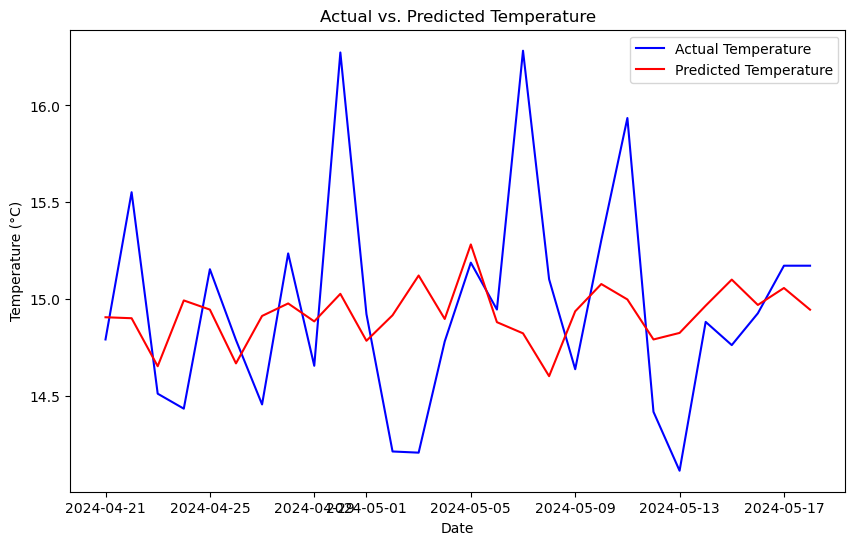

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Temperature', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Temperature', color='red')
plt.title('Actual vs. Predicted Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()